In [24]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs
# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,
random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np . dot (X , transformation )
# Add a bias term to the feature matrix
X = np . c_ [ np . ones (( X . shape [0] , 1) ) , X ]
# Initialize coefficients
W = np . zeros ( X . shape [1])
# Define the logistic sigmoid function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )
# Define the logistic loss ( binary cross - entropy )function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15
    y_pred = np . clip ( y_pred , epsilon , 1 - epsilon ) # Clipto avoid log (0)
    return - ( y_true * np . log ( y_pred ) + (1 - y_true ) * np .log (1 - y_pred ) )
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

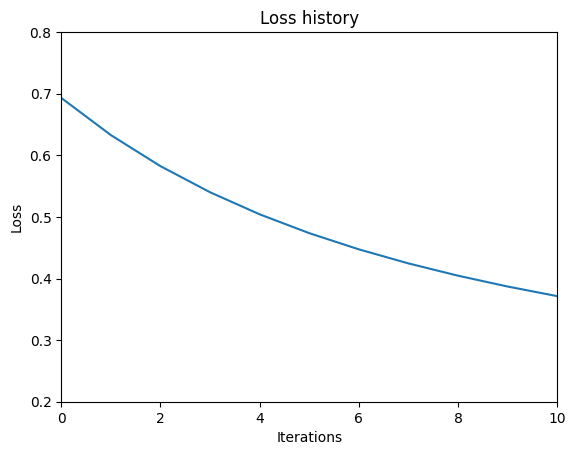

In [25]:
iteration = 0
while iteration <= iterations:
    y_pred = sigmoid(np.dot(X, W))
    loss = log_loss(y, y_pred)
    loss_history.append(np.mean(loss))
    grad_loss = np.dot(X.T, (y_pred - y)) / y.shape[0]
    W -= learning_rate * grad_loss
    iteration += 1

    if iteration > 10:
        break

import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss history')
plt.xlim(0, 10)
plt.ylim(0.2, 0.8)
plt.show()




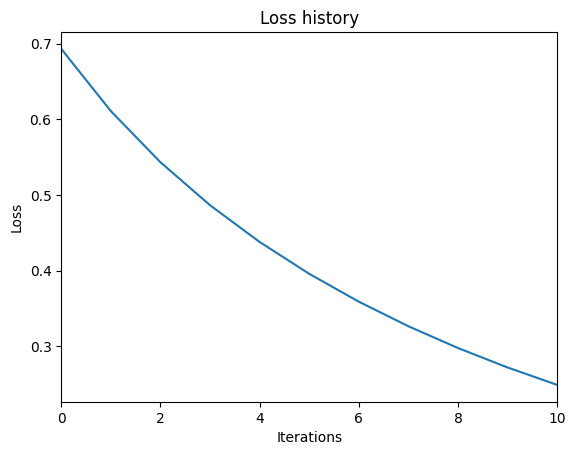

In [26]:
import numpy as np
import matplotlib.pyplot as plt

W = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 10
loss_historyN = []

iteration = 0
while iteration <= iterations:
    y_pred = sigmoid(np.dot(X, W))
    loss = log_loss(y, y_pred)
    loss_historyN.append(np.mean(loss))
    grad_loss = np.dot(X.T, (y_pred - y)) / y.shape[0]
    hessian_loss = np.dot(X.T, np.dot(np.diag(y_pred * (1 - y_pred)), X)) / y.shape[0]
    W -= learning_rate * np.dot(np.linalg.inv(hessian_loss), grad_loss)
    iteration += 1

plt.plot(loss_historyN)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss history')
plt.xlim(0, iterations)
plt.show()


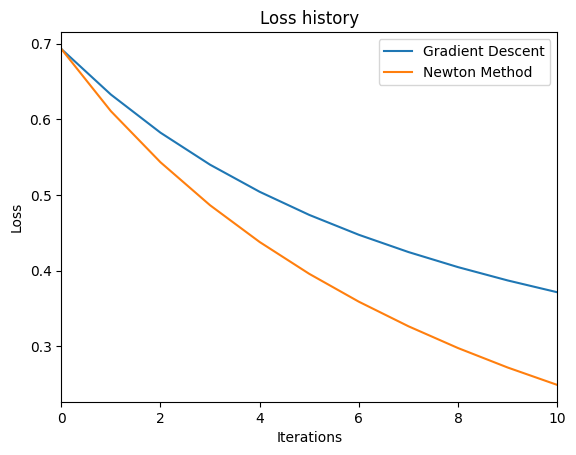

In [27]:

plt.plot(loss_history, label = 'Gradient Descent')
plt.plot(loss_historyN, label = 'Newton Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss history')
plt.xlim(0,10)
plt.legend()
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state
# data loading

train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])
param_grid = {
    'lasso_logistic__C': np.logspace(-2, 2, 9)
}
grid = GridSearchCV(pipeline, param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
best_C = grid.best_estimator_.named_steps['lasso_logistic'].C
print("Best C value:", best_C)


Best C value: 0.31622776601683794


In [30]:
accuracy = accuracy_score(y_test, grid.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.00%


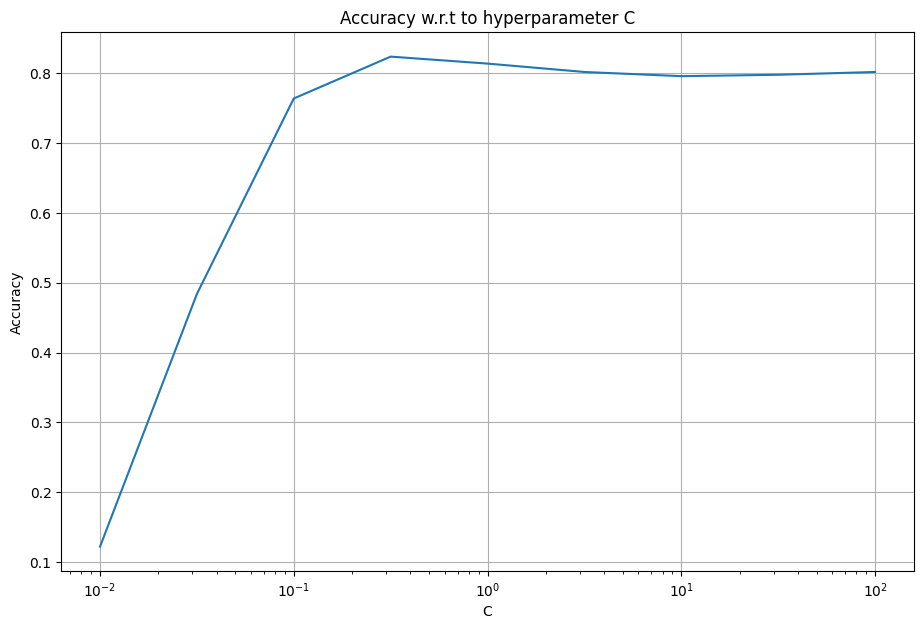

In [33]:

plt.figure(figsize=(11, 7))
plt.plot(grid.cv_results_['param_lasso_logistic__C'].data, grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy w.r.t to hyperparameter C')
plt.grid()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred = grid.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusionMatrix)
print("")

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

i = 0
while i < 10:
    print(f"Class {i} - Precision: {precision[i]:.3f}, Recall: {recall[i]:.3f}, F1-Score: {f1[i]:.3f}")
    i += 1


Confusion matrix:
[[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]

Class 0 - Precision: 1.000, Recall: 0.750, F1-Score: 0.857
Class 1 - Precision: 0.867, Recall: 1.000, F1-Score: 0.929
Class 2 - Precision: 1.000, Recall: 1.000, F1-Score: 1.000
Class 3 - Precision: 0.889, Recall: 1.000, F1-Score: 0.941
Class 4 - Precision: 0.667, Recall: 0.727, F1-Score: 0.696
Class 5 - Precision: 0.600, Recall: 0.750, F1-Score: 0.667
Class 6 - Precision: 1.000, Recall: 0.889, F1-Score: 0.941
Class 7 - Precision: 0.917, Recall: 0.786, F1-Score: 0.846
Class 8 - Precision: 0.917, Recall: 0.917, F1-Score: 0.917
Class 9 - Precision: 0.733, Recall: 0.733, F1-Score: 0.733


In [41]:

w0 = -6
w1 = 0.05
w2 = 1

x1 = 40  
x2 = 3.5  

probability = w0 + w1 * x1 + w2 * x2
estimated_probability = 1 / (1 + np.exp(-probability))
print(f"(a) Estimated probability of receiving an A+: {estimated_probability:.3f}")

target_probability = 0.5

x1_needed = (np.log(target_probability / (1 - target_probability)) - w0 - w2 * x2) / w1
print(f"(b) Hours of study needed for a 50% chance: {x1_needed:.2f}")


(a) Estimated probability of receiving an A+: 0.378
(b) Hours of study needed for a 50% chance: 50.00
